In [35]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import struct

In [36]:
# mnist ref:http://yann.lecun.com/exdb/mnist/
# struct ref:https://www.cnblogs.com/gala/archive/2011/09/22/2184801.html
def LoadImages(file):
    try:
        F = open(file, 'rb')
    except IOError:
        print("open error")
        F.close()

    f = F.read()

    offset=0
    fmt_of_head = '>iiii'
    magic_number, number_of_images, number_of_rows, number_of_columns = struct.unpack_from(fmt_of_head, f, offset)

    offset += struct.calcsize(fmt_of_head)
    fmt_of_images = '>' + str(number_of_rows * number_of_columns) + 'B'

    ImageSet = np.empty((number_of_images, number_of_rows, number_of_columns))
    for i in range(10):# for test
    # for i in range(number_of_images):
        ImageSet[i] = np.array(struct.unpack_from(fmt_of_images, f, offset)).reshape((number_of_rows, number_of_columns))
        offset += struct.calcsize(fmt_of_images)

    F.close()

    return ImageSet

In [37]:
def LoadLabels(file):
    try:
        F = open(file, 'rb')
    except IOError:
        print("open error")
        F.close()

    f = F.read()

    offset=0
    fmt_of_head = '>ii'

    # print(struct.calcsize(fmt_of_head))
    # print(offset)
    # print(f)

    magic_number, number_of_items = struct.unpack_from(fmt_of_head, f, offset)

    offset += struct.calcsize(fmt_of_head)
    fmt_of_labels = '>B'

    LabelSet = np.empty(number_of_items)
    for i in range(10):# for test
    # for i in range(number_of_items):
        LabelSet[i] = struct.unpack_from(fmt_of_labels, f, offset)[0]
        offset += struct.calcsize(fmt_of_labels)

    F.close()

    return LabelSet


5.0


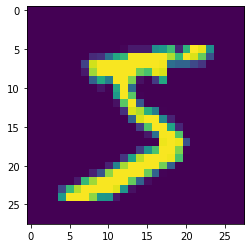

0.0


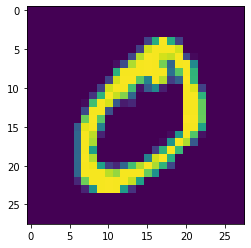

4.0


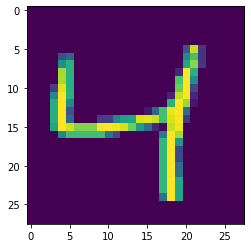

1.0


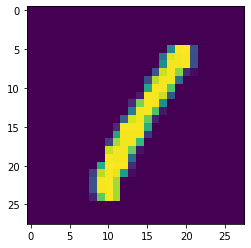

9.0


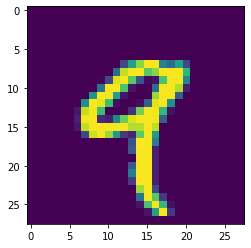

2.0


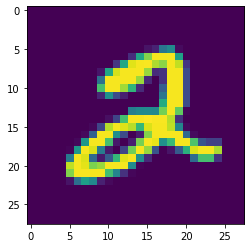

1.0


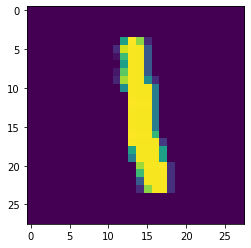

3.0


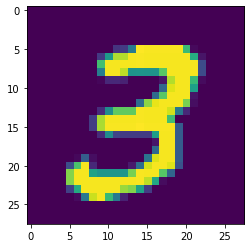

1.0


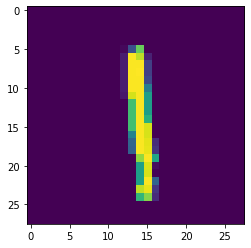

4.0


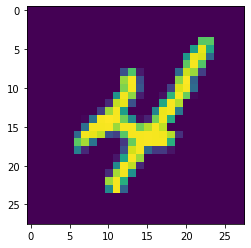

In [39]:
# test
im = LoadImages('train-images.idx3-ubyte')
la = LoadLabels('train-labels.idx1-ubyte')
plt.ion()
for i in range(10):
    plt.imshow(im[i])
    print(la[i])
    plt.pause(1)

In [15]:
# f = open('train-images.idx3-ubyte','rb')
# file = f.read()
# magic_number = file[:4]
# print(int.from_bytes(magic_number, byteorder='big', signed=True))
# print(ord(magic_number))
# int(magic_number.decode('hex'),16)

2051


In [16]:
training = []
for count in range(30):
    image = [item for item in file[16 + 784 * count : 16 + 784 * (count + 1)]]
    # image_np = np.array(image, dtype = np.uint8).reshape(28,28,1)
    # sift = cv.xfeatures2d.SIFT_create(20)
    # kp, des = sift.detectAndCompute(image_np,None)
    # training.append(des)
    # print(kp)
    # plt.ion()
    # plt.imshow(image_np.reshape(28, 28))
    # plt.pause(1)
    # drawkp = cv.drawKeypoints(image_np,kp,image_np)
    # plt.imshow(drawkp)
    # plt.pause(5)
    image_np = np.array(image, dtype = np.uint8)
    training.append(image_np)
training_np = np.array(training)



In [23]:
print(training_np)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)
fit = kmeans.fit(training_np)
# y_pred = KMeans(n_clusters=2, random_state=9).fit_predict(X)

In [19]:
print(fit)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


In [30]:
import pandas as pd

In [31]:
# print(fit[label.ravel()==1])

NameError: name 'label' is not defined

In [33]:
r1=pd.Series(kmeans.labels_).value_counts()
r2=pd.DataFrame(kmeans.cluster_centers_)
r=pd.concat([r2,r1],axis=1)
# r.columns=list(iris_names)
print(r)
r_new=pd.concat([pd.DataFrame(iris_data),pd.Series(kmeans.labels_)],axis=1)
# print(kmeans.cluster_centers_)
# quantity = pd.Series(kmeans.labels_).value_counts()
# print(quantity)
# #获取聚类之后每个聚类中心的数据
# res0Series = pd.Series(kmeans.labels_)
# res0 = res0Series[res0Series.values == 1]
# print(training_np.[res0.index])


0    1    2    3    4    5    6    7    8    9    ...  775  776  777  778  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
9  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

   779  780  781  782  783  0    
0  0.0  0.0  0.0  0.0  0.0    2  
1  0.0  0.0  0.0  0.0  0.0    3  
2  0.0  0.0  0.0  0.

In [18]:
f.close()